# Time analysis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

## Importing and understanding database

In [2]:
crimes = pd.read_csv("/Users/oleoaraujo/Desktop/Crimes-in-Chicago/Crimes_-_2016_to_2020.csv")

In [3]:
crimes.head(20)

,ID,Case Number,Date,Block,Crime_Type,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,MISDEMEANOR,THEFT,OVER $500,RESIDENCE,0,1,631,6.0,8.0,44.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
1,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,0,0,824,8.0,15.0,63.0,2016,2019-04-06 16:04:43,NaN,NaN,NaN
2,12014684,JD189901,2020-03-17 21:30:00,039XX N LECLAIRE AVE,MISDEMEANOR,THEFT,$500 AND UNDER,STREET,0,0,1634,16.0,45.0,15.0,2020,2020-03-25 15:45:43,41.952052,-87.754660,"(41.952051946, -87.754660372)"
3,11645648,JC212959,2018-01-01 08:00:00,024XX N MONITOR AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,0,0,2515,25.0,30.0,19.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
4,11864018,JC476123,2019-09-24 08:00:00,022XX S MICHIGAN AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,0,0,132,1.0,3.0,33.0,2019,2019-10-20 15:56:02,41.852248,-87.623786,"(41.852248185, -87.623786256)"
5,11859805,JC471592,2019-10-13 20:30:00,024XX W CHICAGO AVE,MISDEMEANOR,THEFT,RETAIL THEFT,GROCERY FOOD STORE,0,0,1221,12.0,26.0,24.0,2019,2019-10-20 16:03:03,41.895732,-87.687784,"(41.895732399, -87.687784384)"
6,11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,INFRACTION,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,0,0,1724,17.0,33.0,14.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
7,11645557,JC212685,2018-04-01 00:01:00,080XX S VERNON AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,0,0,631,6.0,6.0,44.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
8,11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,0,0,2515,25.0,36.0,19.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
9,12012127,JD189186,2020-03-18 02:03:00,039XX W JACKSON BLVD,MISDEMEANOR,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,0,1,1132,11.0,28.0,26.0,2020,2020-03-25 15:47:29,41.877110,-87.723990,"(41.877110187, -87.723989719)"


In [4]:
crimes.set_index(crimes.ID, inplace=True)

In [5]:
crimes.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1277232.0,NaN,NaN,NaN,11302467.393457,783643.814895,22245.0,10882663.75,11333324.5,11784053.25,12305810.0
Case Number,1277232,1277072,HZ140230,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,1277232,589815,2017-01-01 00:01:00,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Block,1277232,34700,001XX N STATE ST,4326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime_Type,1277094,4,MISDEMEANOR,626741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Type,1277232,32,THEFT,294745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1277232,491,SIMPLE,140645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location Description,1271428,190,STREET,286880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrest,1277232.0,NaN,NaN,NaN,0.194647,0.395929,0.0,0.0,0.0,0.0,1.0
Domestic,1277232.0,NaN,NaN,NaN,0.166526,0.372552,0.0,0.0,0.0,0.0,1.0


In [6]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
Crime_Type               object
Primary Type             object
Description              object
Location Description     object
Arrest                    int64
Domestic                  int64
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [7]:
# Define "Date" and "Updated on" columns as datetime type
crimes.Date = pd.to_datetime(crimes.Date)
crimes["Updated On"] = pd.to_datetime(crimes["Updated On"])

crimes.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
Crime_Type                      object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

## Understanding the correlations between my numerical variables

In [8]:
crimes_date = crimes[["Primary Type","Date", "Year"]].copy()
crimes_date["Month"] = pd.DatetimeIndex(crimes["Date"]).month
crimes_date["Day"] = pd.DatetimeIndex(crimes["Date"]).day
crimes_date["WeekDay"] = pd.DatetimeIndex(crimes["Date"]).dayofweek
crimes_date["Hour"] = pd.DatetimeIndex(crimes["Date"]).hour
crimes_date["Minutes"] = pd.DatetimeIndex(crimes["Date"]).minute
crimes_date

,Primary Type,Date,Year,Month,Day,WeekDay,Hour,Minutes
ID,,,,,,,,
11646166,THEFT,2018-09-01 00:01:00,2018,9,1,5,0,1
11645836,DECEPTIVE PRACTICE,2016-05-01 00:25:00,2016,5,1,6,0,25
12014684,THEFT,2020-03-17 21:30:00,2020,3,17,1,21,30
11645648,DECEPTIVE PRACTICE,2018-01-01 08:00:00,2018,1,1,0,8,0
11864018,DECEPTIVE PRACTICE,2019-09-24 08:00:00,2019,9,24,1,8,0
...,...,...,...,...,...,...,...,...
12305659,THEFT,2020-12-15 17:00:00,2020,12,15,1,17,0
12305418,CRIMINAL SEXUAL ASSAULT,2017-02-23 00:00:00,2017,2,23,3,0,0
12305346,OTHER OFFENSE,2019-03-02 00:00:00,2019,3,2,5,0,0


In [9]:
crimes_date.dtypes

Primary Type            object
Date            datetime64[ns]
Year                     int64
Month                    int64
Day                      int64
WeekDay                  int64
Hour                     int64
Minutes                  int64
dtype: object

In [10]:
crimes_date["Year-Month"] = crimes_date["Year"].astype("str") + "-0" + crimes_date["Month"].astype("str")
crimes_date["Year-Month"] = crimes_date["Year-Month"].str.replace("-010","-10").str.replace("-011","-11").str.replace("-012","-12")
crimes_date

,Primary Type,Date,Year,Month,Day,WeekDay,Hour,Minutes,Year-Month
ID,,,,,,,,,
11646166,THEFT,2018-09-01 00:01:00,2018,9,1,5,0,1,2018-09
11645836,DECEPTIVE PRACTICE,2016-05-01 00:25:00,2016,5,1,6,0,25,2016-05
12014684,THEFT,2020-03-17 21:30:00,2020,3,17,1,21,30,2020-03
11645648,DECEPTIVE PRACTICE,2018-01-01 08:00:00,2018,1,1,0,8,0,2018-01
11864018,DECEPTIVE PRACTICE,2019-09-24 08:00:00,2019,9,24,1,8,0,2019-09
...,...,...,...,...,...,...,...,...,...
12305659,THEFT,2020-12-15 17:00:00,2020,12,15,1,17,0,2020-12
12305418,CRIMINAL SEXUAL ASSAULT,2017-02-23 00:00:00,2017,2,23,3,0,0,2017-02
12305346,OTHER OFFENSE,2019-03-02 00:00:00,2019,3,2,5,0,0,2019-03


In [11]:
crimes_date["Year-Month-Day"] = crimes_date["Date"].astype('object')
crimes_date["Year-Month-Day"] = pd.DatetimeIndex(crimes_date["Year-Month-Day"]).strftime("%Y-%m-%d")
crimes_date

,Primary Type,Date,Year,Month,Day,WeekDay,Hour,Minutes,Year-Month,Year-Month-Day
ID,,,,,,,,,,
11646166,THEFT,2018-09-01 00:01:00,2018,9,1,5,0,1,2018-09,2018-09-01
11645836,DECEPTIVE PRACTICE,2016-05-01 00:25:00,2016,5,1,6,0,25,2016-05,2016-05-01
12014684,THEFT,2020-03-17 21:30:00,2020,3,17,1,21,30,2020-03,2020-03-17
11645648,DECEPTIVE PRACTICE,2018-01-01 08:00:00,2018,1,1,0,8,0,2018-01,2018-01-01
11864018,DECEPTIVE PRACTICE,2019-09-24 08:00:00,2019,9,24,1,8,0,2019-09,2019-09-24
...,...,...,...,...,...,...,...,...,...,...
12305659,THEFT,2020-12-15 17:00:00,2020,12,15,1,17,0,2020-12,2020-12-15
12305418,CRIMINAL SEXUAL ASSAULT,2017-02-23 00:00:00,2017,2,23,3,0,0,2017-02,2017-02-23
12305346,OTHER OFFENSE,2019-03-02 00:00:00,2019,3,2,5,0,0,2019-03,2019-03-02


In [12]:
crimes_date.dtypes

Primary Type              object
Date              datetime64[ns]
Year                       int64
Month                      int64
Day                        int64
WeekDay                    int64
Hour                       int64
Minutes                    int64
Year-Month                object
Year-Month-Day            object
dtype: object

### Analyzing if there's any major tendency fro crimes in specifique time frames (month, calendar day, day of the week or hour)

<AxesSubplot:>

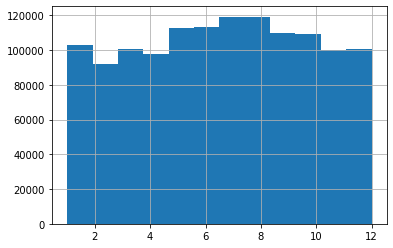

In [13]:
crimes_date["Month"].hist(bins=12)

<AxesSubplot:>

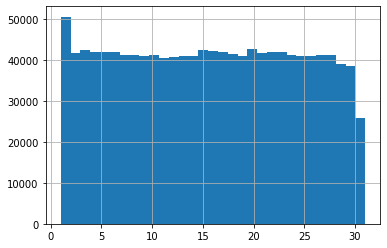

In [14]:
crimes_date["Day"].hist(bins=31)

<AxesSubplot:>

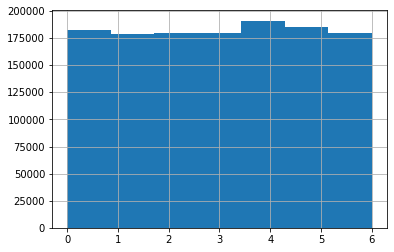

In [15]:
crimes_date["WeekDay"].hist(bins=7)

<AxesSubplot:>

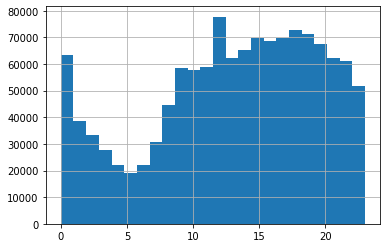

In [16]:
crimes_date["Hour"].hist(bins=24)

We can see that most crimes are reportedduring the day, which may indicate as well that they predominantly happen or are noticed during the day.

### Plotting a line graph with the variation of crimes per year 

In [17]:
crimes_date.groupby(by=["Year","Month"]).count()

Primary Type   Date    Day  WeekDay   Hour  Minutes  Year-Month  \
Year Month                                                                    
2016 1             20714  20714  20714    20714  20714    20714       20714   
     2             18736  18736  18736    18736  18736    18736       18736   
     3             22042  22042  22042    22042  22042    22042       22042   
     4             21153  21153  21153    21153  21153    21153       21153   
     5             23531  23531  23531    23531  23531    23531       23531   
     6             24057  24057  24057    24057  24057    24057       24057   
     7             24844  24844  24844    24844  24844    24844       24844   
     8             24904  24904  24904    24904  24904    24904       24904   
     9             23681  23681  23681    23681  23681    23681       23681   
     10            23743  23743  23743    23743  23743    23743       23743   
     11            21742  21742  21742    21742  21742    21742       21742   
     12            20378  20378  20378    20378  20378    20378       20378   
2017 1             22113  22113  22113    22113  22113    22113       22113   
     2             19296  19296  19296    19296  19296    19296       19296   
     3             20552  20552  20552    20552  20552    20552       20552   
     4             21680  21680  21680    21680  21680    21680       21680   
     5             23365  23365  23365    23365  23365    23365       23365   
     6             23846  23846  23846    23846  23846    23846       23846   
     7             24853  24853  24853    24853  24853    24853       24853   
     8             24727  24727  24727    24727  24727    24727       24727   
     9             22837  22837  22837    22837  22837    22837       22837   
     10            22908  22908  22908    22908  22908    22908       22908   
     11            21480  21480  21480    21480  21480    21480       21480   
     12            21088  21088  21088    21088  21088    21088       21088   
2018 1             20476  20476  20476    20476  20476    20476       20476   
     2             17337  17337  17337    17337  17337    17337       17337   
     3             21213  21213  21213    21213  21213    21213       21213   
     4             21129  21129  21129    21129  21129    21129       21129   
     5             24713  24713  24713    24713  24713    24713       24713   
     6             24215  24215  24215    24215  24215    24215       24215   
     7             25251  25251  25251    25251  25251    25251       25251   
     8             25436  25436  25436    25436  25436    25436       25436   
     9             23093  23093  23093    23093  23093    23093       23093   
     10            22823  22823  22823    22823  22823    22823       22823   
     11            20664  20664  20664    20664  20664    20664       20664   
     12            21971  21971  21971    21971  21971    21971       21971   
2019 1             19641  19641  19641    19641  19641    19641       19641   
     2             18397  18397  18397    18397  18397    18397       18397   
     3             20410  20410  20410    20410  20410    20410       20410   
     4             20999  20999  20999    20999  20999    20999       20999   
     5             23633  23633  23633    23633  23633    23633       23633   
     6             23584  23584  23584    23584  23584    23584       23584   
     7             24830  24830  24830    24830  24830    24830       24830   
     8             24366  24366  24366    24366  24366    24366       24366   
     9             22404  22404  22404    22404  22404    22404       22404   
     10            21649  21649  21649    21649  21649    21649       21649   
     11            19900  19900  19900    19900  19900    19900       19900   
     12            20754  20754  20754    20754  20754    20754       20754   
2020 1             19767  19767  19767    19767  19767    1976

In [18]:
crimes_date

,Primary Type,Date,Year,Month,Day,WeekDay,Hour,Minutes,Year-Month,Year-Month-Day
ID,,,,,,,,,,
11646166,THEFT,2018-09-01 00:01:00,2018,9,1,5,0,1,2018-09,2018-09-01
11645836,DECEPTIVE PRACTICE,2016-05-01 00:25:00,2016,5,1,6,0,25,2016-05,2016-05-01
12014684,THEFT,2020-03-17 21:30:00,2020,3,17,1,21,30,2020-03,2020-03-17
11645648,DECEPTIVE PRACTICE,2018-01-01 08:00:00,2018,1,1,0,8,0,2018-01,2018-01-01
11864018,DECEPTIVE PRACTICE,2019-09-24 08:00:00,2019,9,24,1,8,0,2019-09,2019-09-24
...,...,...,...,...,...,...,...,...,...,...
12305659,THEFT,2020-12-15 17:00:00,2020,12,15,1,17,0,2020-12,2020-12-15
12305418,CRIMINAL SEXUAL ASSAULT,2017-02-23 00:00:00,2017,2,23,3,0,0,2017-02,2017-02-23
12305346,OTHER OFFENSE,2019-03-02 00:00:00,2019,3,2,5,0,0,2019-03,2019-03-02


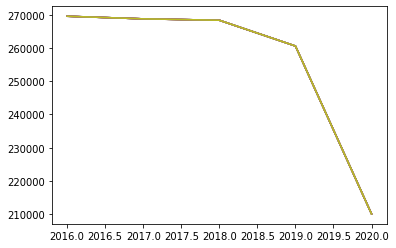

In [19]:
# Plotting the number of crimes per year
plt.plot(crimes_date.groupby("Year").count())

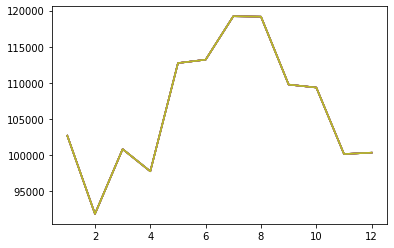

In [20]:
# Plotting the number of crimes per year (aggregating years)
plt.plot(crimes_date.groupby("Month").count())

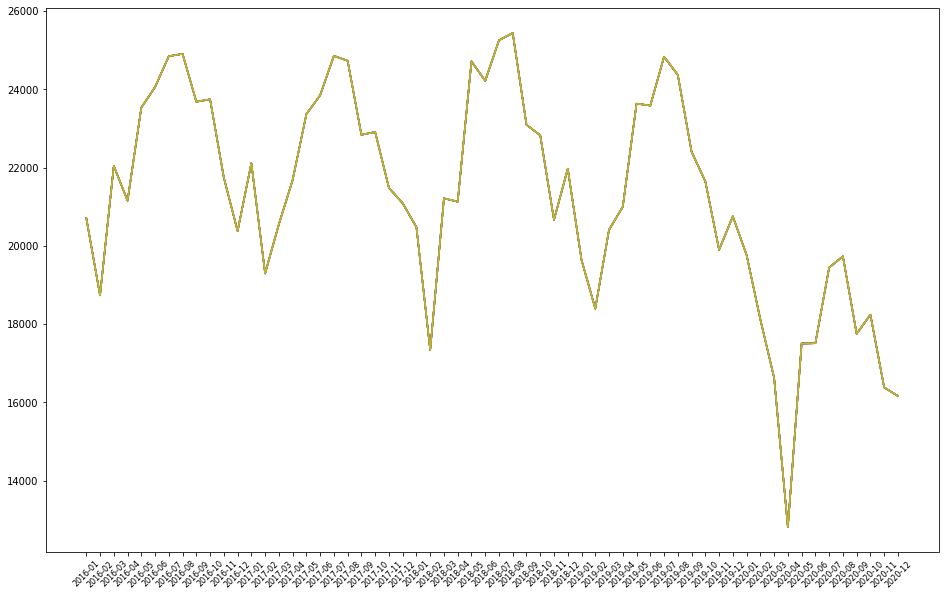

In [21]:
fig = plt.figure(figsize=(16,10))
plt.xticks(rotation=45,size=8)
plt.plot(crimes_date.groupby("Year-Month").count())

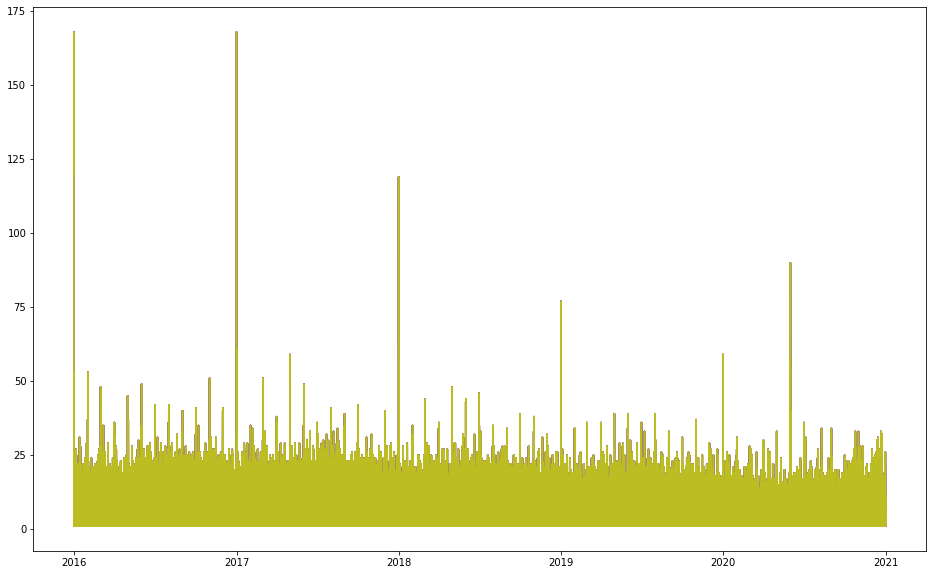

In [22]:
# Plotting the crimes per date (but approximated to each minute)

fig = plt.figure(figsize=(16,10))
plt.plot(crimes_date.groupby("Date").count())

<ipython-input-23-ec21a8911ef3>:4: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=20, rotation =45)


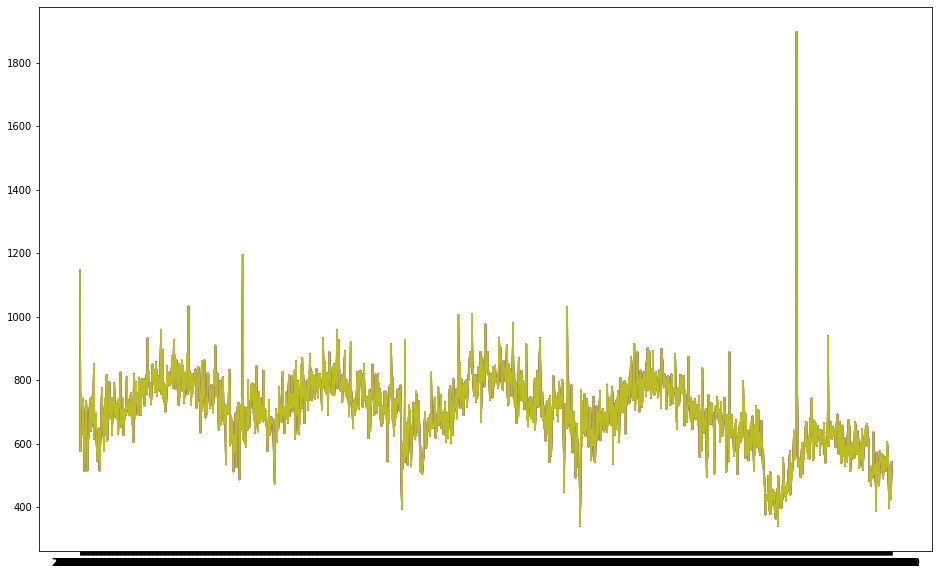

In [23]:
# Getting the aggregate of crimes per day
fig = plt.figure(figsize=(16,10))
plt.plot(crimes_date.groupby("Year-Month-Day").count())
plt.locator_params(axis='x', nbins=20, rotation =45)

In [24]:
crimes_date.groupby("Year-Month-Day").count().sort_values("Date", ascending=False)

,Primary Type,Date,Year,Month,Day,WeekDay,Hour,Minutes,Year-Month
Year-Month-Day,,,,,,,,,
2020-05-31,1897,1897,1897,1897,1897,1897,1897,1897,1897
2017-01-01,1195,1195,1195,1195,1195,1195,1195,1195,1195
2016-01-01,1147,1147,1147,1147,1147,1147,1147,1147,1147
2016-09-01,1032,1032,1032,1032,1032,1032,1032,1032,1032
2019-01-01,1031,1031,1031,1031,1031,1031,1031,1031,1031
...,...,...,...,...,...,...,...,...,...
2020-04-02,377,377,377,377,377,377,377,377,377
2020-03-22,376,376,376,376,376,376,376,376,376
2020-04-14,363,363,363,363,363,363,363,363,363


As we can see, the most number of crimes reported in a single day were related to the day of the protests for **George Floyd** and **#BlackLivesMatter**, on **31st May 2020**.

Next on line, the days that have the most number of crimes is the New Year (January 1st).

In [25]:
terrible_days = crimes_date.groupby("Date").count()
terrible_days

,Primary Type,Year,Month,Day,WeekDay,Hour,Minutes,Year-Month,Year-Month-Day
Date,,,,,,,,,
2016-01-01 00:00:00,120,120,120,120,120,120,120,120,120
2016-01-01 00:01:00,168,168,168,168,168,168,168,168,168
2016-01-01 00:02:00,3,3,3,3,3,3,3,3,3
2016-01-01 00:04:00,1,1,1,1,1,1,1,1,1
2016-01-01 00:05:00,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
2020-12-31 23:38:00,1,1,1,1,1,1,1,1,1
2020-12-31 23:40:00,1,1,1,1,1,1,1,1,1
2020-12-31 23:45:00,6,6,6,6,6,6,6,6,6


In [41]:
terrible_days.sort_values("Primary Type", ascending=False).head(10)

,Primary Type,Year,Month,Day,WeekDay,Hour,Minutes,Year-Month,Year-Month-Day
Date,,,,,,,,,
2016-01-01 00:01:00,168,168,168,168,168,168,168,168,168
2017-01-01 00:01:00,168,168,168,168,168,168,168,168,168
2017-01-01 00:00:00,131,131,131,131,131,131,131,131,131
2016-01-01 00:00:00,120,120,120,120,120,120,120,120,120
2018-01-01 00:01:00,119,119,119,119,119,119,119,119,119
2018-01-01 00:00:00,99,99,99,99,99,99,99,99,99
2020-05-31 16:00:00,90,90,90,90,90,90,90,90,90
2020-05-31 15:00:00,79,79,79,79,79,79,79,79,79
2019-01-01 00:00:00,77,77,77,77,77,77,77,77,77


In [27]:
crimes_date.groupby(by=["Year", "Month"]).count()

Primary Type   Date    Day  WeekDay   Hour  Minutes  Year-Month  \
Year Month                                                                    
2016 1             20714  20714  20714    20714  20714    20714       20714   
     2             18736  18736  18736    18736  18736    18736       18736   
     3             22042  22042  22042    22042  22042    22042       22042   
     4             21153  21153  21153    21153  21153    21153       21153   
     5             23531  23531  23531    23531  23531    23531       23531   
     6             24057  24057  24057    24057  24057    24057       24057   
     7             24844  24844  24844    24844  24844    24844       24844   
     8             24904  24904  24904    24904  24904    24904       24904   
     9             23681  23681  23681    23681  23681    23681       23681   
     10            23743  23743  23743    23743  23743    23743       23743   
     11            21742  21742  21742    21742  21742    21742       21742   
     12            20378  20378  20378    20378  20378    20378       20378   
2017 1             22113  22113  22113    22113  22113    22113       22113   
     2             19296  19296  19296    19296  19296    19296       19296   
     3             20552  20552  20552    20552  20552    20552       20552   
     4             21680  21680  21680    21680  21680    21680       21680   
     5             23365  23365  23365    23365  23365    23365       23365   
     6             23846  23846  23846    23846  23846    23846       23846   
     7             24853  24853  24853    24853  24853    24853       24853   
     8             24727  24727  24727    24727  24727    24727       24727   
     9             22837  22837  22837    22837  22837    22837       22837   
     10            22908  22908  22908    22908  22908    22908       22908   
     11            21480  21480  21480    21480  21480    21480       21480   
     12            21088  21088  21088    21088  21088    21088       21088   
2018 1             20476  20476  20476    20476  20476    20476       20476   
     2             17337  17337  17337    17337  17337    17337       17337   
     3             21213  21213  21213    21213  21213    21213       21213   
     4             21129  21129  21129    21129  21129    21129       21129   
     5             24713  24713  24713    24713  24713    24713       24713   
     6             24215  24215  24215    24215  24215    24215       24215   
     7             25251  25251  25251    25251  25251    25251       25251   
     8             25436  25436  25436    25436  25436    25436       25436   
     9             23093  23093  23093    23093  23093    23093       23093   
     10            22823  22823  22823    22823  22823    22823       22823   
     11            20664  20664  20664    20664  20664    20664       20664   
     12            21971  21971  21971    21971  21971    21971       21971   
2019 1             19641  19641  19641    19641  19641    19641       19641   
     2             18397  18397  18397    18397  18397    18397       18397   
     3             20410  20410  20410    20410  20410    20410       20410   
     4             20999  20999  20999    20999  20999    20999       20999   
     5             23633  23633  23633    23633  23633    23633       23633   
     6             23584  23584  23584    23584  23584    23584       23584   
     7             24830  24830  24830    24830  24830    24830       24830   
     8             24366  24366  24366    24366  24366    24366       24366   
     9             22404  22404  22404    22404  22404    22404       22404   
     10            21649  21649  21649    21649  21649    21649       21649   
     11            19900  19900  19900    19900  19900    19900       19900   
     12            20754  20754  20754    20754  20754    20754       20754   
2020 1             19767  19767  19767    19767  19767    1976

#### Simplifying 

In [65]:
aggregated_crimes = pd.pivot_table(crimes_date[["Year-Month-Day", "Primary Type", "Date"]], index=crimes_date[["Year-Month-Day", "Primary Type"]], aggfunc="count")
aggregated_crimes.reset_index(inplace=True)
aggregated_crimes.rename(columns={"Date":"Number_of_Crimes"}, inplace=True)
aggregated_crimes.head(10)

,Year-Month-Day,Primary Type,Number_of_Crimes
0,2016-01-01,ARSON,1
1,2016-01-01,ASSAULT,43
2,2016-01-01,BATTERY,229
3,2016-01-01,BURGLARY,14
4,2016-01-01,CRIMINAL DAMAGE,113
5,2016-01-01,CRIMINAL SEXUAL ASSAULT,40
6,2016-01-01,CRIMINAL TRESPASS,8
7,2016-01-01,DECEPTIVE PRACTICE,227
8,2016-01-01,HOMICIDE,3
9,2016-01-01,INTERFERENCE WITH PUBLIC OFFICER,2


## Another dataset about protests in the USA

In [29]:
protests_usa = pd.read_csv("/Users/oleoaraujo/Desktop/Crimes-in-Chicago/protests_usa.csv")
protests_usa.head()

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles
0,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...,1
1,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4
2,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1
3,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1
4,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1


In [30]:
protests_chicago = protests_usa[protests_usa.Location.str.contains("Chicago")].copy()
protests_chicago.reset_index(drop=True, inplace=True)
protests_chicago.head(20)

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles
0,2017-01-21,"Chicago, IL",250000.0,Civil Rights (Women's March),Civil Rights; For women's rights; Women's March,Yes,http://www.nbcchicago.com/news/local/womens-ma...,4
1,2017-01-28,"O'Hare Airport, Chicago, IL",1000.0,Immigration (Airport),Immigration; Against travel ban,Yes,http://www.nbcchicago.com/news/local/chicago-o...,1
2,2017-02-02,"Department of Homeland Security, Chicago, IL",200.0,Immigration,Immigration; Against travel ban,Yes,http://chicago.cbslocal.com/2017/02/02/hundred...,1
3,2017-02-12,"Trump Tower, Chicago, IL",100.0,Executive,Executive; Against 45th president,Yes,http://wsvn.com/news/politics/hundreds-gather-...,1
4,2017-02-16,"Union Park, Chicago, IL",4000.0,Immigration (Day Without Immigrants),Immigration; For compassionate immigration; Da...,Yes,http://www.fightbacknews.org/2017/2/16/4000-pl...,1
5,2017-02-19,"Chicago, IL",1000.0,Executive,Executive; Against 45th president,Yes,http://wgntv.com/2017/02/19/anti-trump-protest...,2
6,2017-02-20,"Chicago, IL",1000.0,Executive (Not My President's Day),Executive; Against 45th president,Yes,http://www.chicagotribune.com/news/nationworld...,1
7,2017-02-23,"Chicago, IL",50.0,Legislative,Legislative; Against 45th president; For great...,Yes,http://www.chicagotribune.com/suburbs/daily-so...,1
8,2017-02-23,"Chicago, IL",150.0,Legislative,Legislative; Against 45th president; For great...,Yes,http://www.chicagotribune.com/suburbs/daily-so...,1
9,2017-03-03,"Chicago, IL",1000.0,Civil Rights (Transgender Rights),Civil Rights; Pro-LGBTQ; For transgender rights,Yes,http://www.chicagotribune.com/news/local/break...,1


In [31]:
protests_chicago["Event (legacy; see tags)"].nunique()

85

In [32]:
protests_chicago["Event (legacy; see tags)"].value_counts()

Racial Injustice                         93
Other                                    38
Collective Bargaining                    36
Executive                                24
Education                                17
                                         ..
Collective Bargaining (Privatization)     1
Other (Pro Police)                        1
Collective Bargaining (Teacher Pay)       1
Immigration (Anti-ICE)                    1
Education (Special Education)             1
Name: Event (legacy; see tags), Length: 85, dtype: int64

In [33]:
protests_chicago["Event type"] = protests_chicago["Event (legacy; see tags)"].str.split('(',expand=True)[0].str.strip()

In [34]:
protests_chicago["Event type"].unique()

array(['Civil Rights', 'Immigration', 'Executive', 'Legislative',
       'Racial Injustice', 'Education', 'Healthcare', 'Other', 'Guns',
       'Environment', 'Collective Bargaining', 'International Relations',
       'Judicial'], dtype=object)

In [62]:
protests_chicago.shape

(401, 9)

In [64]:
protests_chicago.head(10)

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles,Event type
0,2017-01-21,"Chicago, IL",250000.0,Civil Rights (Women's March),Civil Rights; For women's rights; Women's March,Yes,http://www.nbcchicago.com/news/local/womens-ma...,4,Civil Rights
1,2017-01-28,"O'Hare Airport, Chicago, IL",1000.0,Immigration (Airport),Immigration; Against travel ban,Yes,http://www.nbcchicago.com/news/local/chicago-o...,1,Immigration
2,2017-02-02,"Department of Homeland Security, Chicago, IL",200.0,Immigration,Immigration; Against travel ban,Yes,http://chicago.cbslocal.com/2017/02/02/hundred...,1,Immigration
3,2017-02-12,"Trump Tower, Chicago, IL",100.0,Executive,Executive; Against 45th president,Yes,http://wsvn.com/news/politics/hundreds-gather-...,1,Executive
4,2017-02-16,"Union Park, Chicago, IL",4000.0,Immigration (Day Without Immigrants),Immigration; For compassionate immigration; Da...,Yes,http://www.fightbacknews.org/2017/2/16/4000-pl...,1,Immigration
5,2017-02-19,"Chicago, IL",1000.0,Executive,Executive; Against 45th president,Yes,http://wgntv.com/2017/02/19/anti-trump-protest...,2,Executive
6,2017-02-20,"Chicago, IL",1000.0,Executive (Not My President's Day),Executive; Against 45th president,Yes,http://www.chicagotribune.com/news/nationworld...,1,Executive
7,2017-02-23,"Chicago, IL",50.0,Legislative,Legislative; Against 45th president; For great...,Yes,http://www.chicagotribune.com/suburbs/daily-so...,1,Legislative
8,2017-02-23,"Chicago, IL",150.0,Legislative,Legislative; Against 45th president; For great...,Yes,http://www.chicagotribune.com/suburbs/daily-so...,1,Legislative
9,2017-03-03,"Chicago, IL",1000.0,Civil Rights (Transgender Rights),Civil Rights; Pro-LGBTQ; For transgender rights,Yes,http://www.chicagotribune.com/news/local/break...,1,Civil Rights


In [36]:
protests_chicago.isna().sum()

Date                          0
Location                      0
Attendees                   160
Event (legacy; see tags)      0
Tags                          0
Curated                       0
Source                        0
Total Articles                0
Event type                    0
dtype: int64

In [37]:
protests_chicago.nunique()

Date                        305
Location                     88
Attendees                    41
Event (legacy; see tags)     85
Tags                        169
Curated                       2
Source                      368
Total Articles               26
Event type                   13
dtype: int64

In [38]:
protests_chicago.dtypes

Date                         object
Location                     object
Attendees                   float64
Event (legacy; see tags)     object
Tags                         object
Curated                      object
Source                       object
Total Articles                int64
Event type                   object
dtype: object

In [39]:
protests_chicago.Date.describe()

count            401
unique           305
top       2020-07-24
freq               6
Name: Date, dtype: object

## Joining the 2 Dataframes:

In [139]:
crimes_events = pd.merge(aggregated_crimes, protests_chicago[["Date","Event type", "Attendees"]],
                  how="left", left_on="Year-Month-Day", right_on="Date")
crimes_events.drop(columns="Date",inplace=True)
crimes_events.shape

(40418, 5)

In [140]:
crimes_events.head()

,Year-Month-Day,Primary Type,Number_of_Crimes,Event type,Attendees
0,2016-01-01,ARSON,1,NaN,NaN
1,2016-01-01,ASSAULT,43,NaN,NaN
2,2016-01-01,BATTERY,229,NaN,NaN
3,2016-01-01,BURGLARY,14,NaN,NaN
4,2016-01-01,CRIMINAL DAMAGE,113,NaN,NaN


In [141]:
crimes_events.isna().sum()

Year-Month-Day          0
Primary Type            0
Number_of_Crimes        0
Event type          32313
Attendees           35506
dtype: int64

In [142]:
crimes_events["Year"] = pd.DatetimeIndex(crimes_events["Year-Month-Day"]).year
crimes_events["Month"] = pd.DatetimeIndex(crimes_events["Year-Month-Day"]).month
crimes_events["Day"] = pd.DatetimeIndex(crimes_events["Year-Month-Day"]).day
crimes_events["WeekDay"] = pd.DatetimeIndex(crimes_events["Year-Month-Day"]).dayofweek
crimes_events

,Year-Month-Day,Primary Type,Number_of_Crimes,Event type,Attendees,Year,Month,Day,WeekDay
0,2016-01-01,ARSON,1,NaN,NaN,2016,1,1,4
1,2016-01-01,ASSAULT,43,NaN,NaN,2016,1,1,4
2,2016-01-01,BATTERY,229,NaN,NaN,2016,1,1,4
3,2016-01-01,BURGLARY,14,NaN,NaN,2016,1,1,4
4,2016-01-01,CRIMINAL DAMAGE,113,NaN,NaN,2016,1,1,4
...,...,...,...,...,...,...,...,...,...
40413,2020-12-31,ROBBERY,12,NaN,NaN,2020,12,31,3
40414,2020-12-31,SEX OFFENSE,2,NaN,NaN,2020,12,31,3
40415,2020-12-31,STALKING,1,NaN,NaN,2020,12,31,3
40416,2020-12-31,THEFT,71,NaN,NaN,2020,12,31,3


In [143]:
# Let's drop 2016 because we don't have protest information for 2016
crimes_events = crimes_events[crimes_events.Year!=2016].copy()
crimes_events

,Year-Month-Day,Primary Type,Number_of_Crimes,Event type,Attendees,Year,Month,Day,WeekDay
7793,2017-01-01,ASSAULT,46,NaN,NaN,2017,1,1,6
7794,2017-01-01,BATTERY,207,NaN,NaN,2017,1,1,6
7795,2017-01-01,BURGLARY,23,NaN,NaN,2017,1,1,6
7796,2017-01-01,CRIMINAL DAMAGE,115,NaN,NaN,2017,1,1,6
7797,2017-01-01,CRIMINAL SEXUAL ASSAULT,46,NaN,NaN,2017,1,1,6
...,...,...,...,...,...,...,...,...,...
40413,2020-12-31,ROBBERY,12,NaN,NaN,2020,12,31,3
40414,2020-12-31,SEX OFFENSE,2,NaN,NaN,2020,12,31,3
40415,2020-12-31,STALKING,1,NaN,NaN,2020,12,31,3
40416,2020-12-31,THEFT,71,NaN,NaN,2020,12,31,3


In [144]:
crimes_events.isna().sum()

Year-Month-Day          0
Primary Type            0
Number_of_Crimes        0
Event type          24520
Attendees           27713
Year                    0
Month                   0
Day                     0
WeekDay                 0
dtype: int64

In [145]:
crimes_events.columns

Index(['Year-Month-Day', 'Primary Type', 'Number_of_Crimes', 'Event type',
       'Attendees', 'Year', 'Month', 'Day', 'WeekDay'],
      dtype='object')

In [146]:
crimes_events.reset_index(inplace=True)

# Droping index column created before
crimes_events.drop(columns='index', inplace=True)

In [ ]:
# Cleaning this new dataframe

    ## Filling missing values
crimes_events["Event type"].fillna("-",inplace=True)
crimes_events.Attendees.fillna(0,inplace=True)

    ## Renaming columns
crimes_events.rename(columns={"Event type":"Protest_Type", "Attendees":"Protest_Atendees",
                             'Primary Type': 'Primary_Type'}, inplace=True)

    ## Reorganizing columns
crimes_events = crimes_events[['Year-Month-Day', 'Year', 'Month', 'Day', 'WeekDay', 'Primary_Type',
                               'Number_of_Crimes', 'Protest_Type', 'Protest_Atendees']]
    ## Resetting index
crimes_events.reset_index(inplace=True)

    ## Droping index column created before
crimes_events.drop(columns='index', inplace=True)

In [151]:
crimes_events.isna().sum()

Year-Month-Day      0
Year                0
Month               0
Day                 0
WeekDay             0
Primary_Type        0
Number_of_Crimes    0
Protest_Type        0
Protest_Atendees    0
dtype: int64

In [152]:
crimes_events

,Year-Month-Day,Year,Month,Day,WeekDay,Primary_Type,Number_of_Crimes,Protest_Type,Protest_Atendees
0,2017-01-01,2017,1,1,6,ASSAULT,46,-,0.0
1,2017-01-01,2017,1,1,6,BATTERY,207,-,0.0
2,2017-01-01,2017,1,1,6,BURGLARY,23,-,0.0
3,2017-01-01,2017,1,1,6,CRIMINAL DAMAGE,115,-,0.0
4,2017-01-01,2017,1,1,6,CRIMINAL SEXUAL ASSAULT,46,-,0.0
...,...,...,...,...,...,...,...,...,...
32620,2020-12-31,2020,12,31,3,ROBBERY,12,-,0.0
32621,2020-12-31,2020,12,31,3,SEX OFFENSE,2,-,0.0
32622,2020-12-31,2020,12,31,3,STALKING,1,-,0.0
32623,2020-12-31,2020,12,31,3,THEFT,71,-,0.0


## Regression Analysis

Step 0: checking the correlations to the variable we want to predict (number of crimes per date).

In [153]:
crimes_events.corr().Number_of_Crimes

Year               -0.046945
Month               0.005761
Day                -0.004899
WeekDay             0.000713
Number_of_Crimes    1.000000
Protest_Atendees    0.000602
Name: Number_of_Crimes, dtype: float64

In [154]:
crimes_events.columns

Index(['Year-Month-Day', 'Year', 'Month', 'Day', 'WeekDay', 'Primary_Type',
       'Number_of_Crimes', 'Protest_Type', 'Protest_Atendees'],
      dtype='object')

### Model construction

In [132]:
from statsmodels.formula.api import ols

In [156]:
model=ols('Number_of_Crimes ~ Year + Month + Day + WeekDay + Primary_Type + Protest_Type + Protest_Atendees',
          data=crimes_events)

In [157]:
# Calculating model
model_fit=model.fit()

In [158]:
# Checking the results
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Number_of_Crimes   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     5757.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:39:30   Log-Likelihood:            -1.3279e+05
No. Observations:               32625   AIC:                         2.657e+05
Df Residuals:                   32575   BIC:                         2.661e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          4984.0854    147.945     33.689      0.000    4694.108    5274.062
Primary_Type[T.ASSAULT]                              51.9668      0.569     91.340      0.000      50.852      53.082
Primary_Type[T.BATTERY]                             128.4684      0.569    225.804      0.000     127.353     129.584
Primary_Type[T.BURGLARY]                             27.7137      0.569     48.711      0.000      26.599      28.829
Primary_Type[T.CONCEALED CARRY LICENSE VIOLATION]    -0.1283      0.771     -0.166      0.868      -1.640       1.384
Primary_Type[T.CRIMINAL DAMAGE]                      72.3654      0.569    127.194      0.000      71.250      73.481
Primary_Type[T.CRIMINAL SEXUAL ASSAULT]               2.3237      0.572      4.066      0.000       1.203       3.444
Primary_Type[T.CRIMINAL TRESPASS]                    14.8277      0.569     26.062      0.000      13.713      15.943
Primary_Type[T.DECEPTIVE PRACTICE]                   48.9133      0.569     85.973      0.000      47.798      50.028
Primary_Type[T.GAMBLING]                             -1.7784      0.825     -2.156      0.031      -3.395      -0.162
Primary_Type[T.HOMICIDE]                              0.3825      0.600      0.637      0.524      -0.794       1.559
Primary_Type[T.HUMAN TRAFFICKING]                    -1.3315      2.286     -0.583      0.560      -5.811       3.148
Primary_Type[T.INTERFERENCE WITH PUBLIC OFFICER]      1.3087      0.580      2.256      0.024       0.172       2.446
Primary_Type[T.INTIMIDATION]                         -0.4507      0.752     -0.599      0.549      -1.925       1.024
Primary_Type[T.KIDNAPPING]                           -0.9002      0.758     -1.187      0.235      -2.386       0.586
Primary_Type[T.LIQUOR LAW VIOLATION]                 -0.8249      0.735     -1.123      0.262      -2.265       0.615
Primary_Type[T.MOTOR VEHICLE THEFT]                  25.8142      0.569     45.373      0.000      24.699      26.929
Primary_Type[T.NARCOTICS]                            30.2095      0.569     53.098      0.000      29.094      31.325
Primary_Type[T.NON-CRIMINAL]                         -3.1956      1.620     -1.973      0.049      -6.371      -0.021
Primary_Type[T.OBSCENITY]                            -1.3395      0.984     -1.361      0.173      -3.268       0.589
Primary_Type[T.OFFENSE INVOLVING CHILDREN]            4.1648      0.570      7.309      0.000       3.048       5.282
Primary_Type[T.OTHER NARCOTIC VIOLATION]             -1.3712      2.870     -0.478      0.633      -6.997       4.255
Primary_Type[T.OTHER OFFENSE]                        41.4826      0.569     72.912      0.000      40.367      42.598
Primary_Type[T.

### Trying to optimize the model and respect the assumptions 